In [ ]:
import numpy as np
# address
import sys
sys.path.append('/content/drive/MyDrive/SS_Fair/Metrics_Evaluations')
import metrics_eval
from metrics_eval import Metrics

SyntaxError: ignored

In [ ]:
# Test case 1: Toxicity Rates
y_pred = np.array([0, 1, 1, 0, 1, 0, 1])
actual_labels = np.array([1, 1, 0, 0, 1, 1, 0])
protected_labels = np.array([0, 0, 1, 1, 1, 0, 0])
thres = 0.5
metrics = Metrics(y_pred, actual_labels, protected_labels, thres)
toxicity_rates = metrics.get_toxicity_rates()
assert toxicity_rates == (0.67, 0.50), f'Test Case 1 Failed: expected (0.67, 0.50), got {toxicity_rates}'


NameError: ignored

# True positive rate (TPR) known (sensitivity or recall)[IBM](https://www.ibm.com/docs/en/cloud-paks/cp-data/4.6.x?topic=overview-true-positive-rate-tpr)

The True positive rate (TPR) gives the proportion of correct predictions in predictions of positive class.

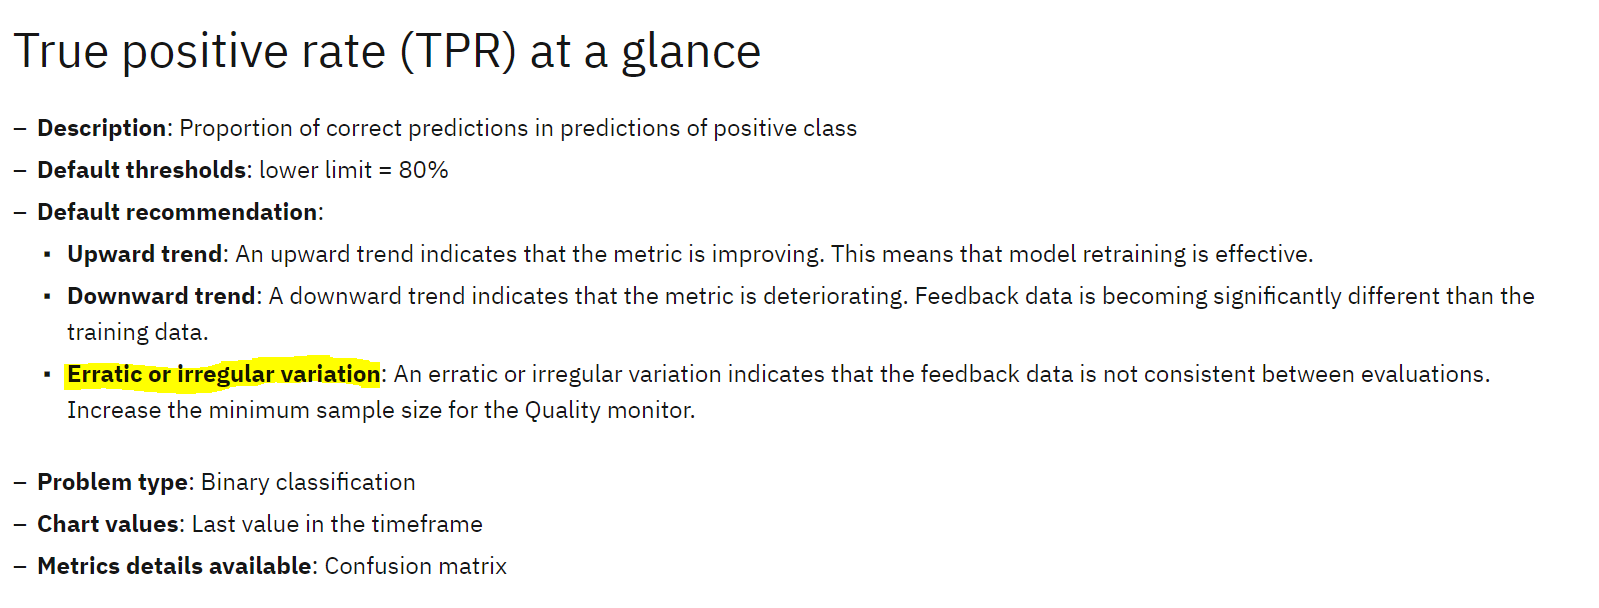



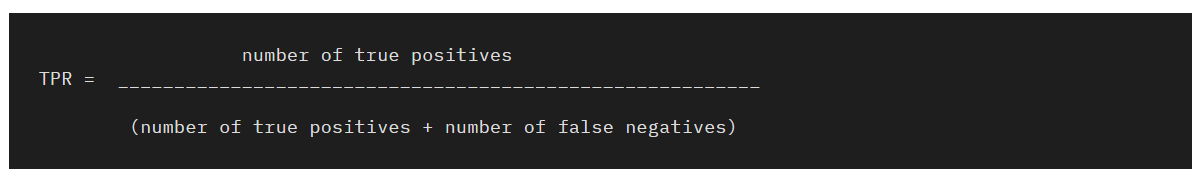

In [ ]:

# Test case 2: True Positive Rates
y_pred = np.array([0, 1, 1, 0, 1, 0, 1])
actual_labels = np.array([1, 1, 0, 0, 1, 1, 0])
protected_labels = np.array([0, 0, 1, 1, 1, 0, 0])
thres = 0.5
metrics = metrics_eval.Metrics(y_pred, actual_labels, protected_labels, thres)
true_positive_rates = metrics.get_true_positive_rates()
assert true_positive_rates == (1, 0.33), f'Test Case 2 Failed: expected (1, 0.33), got {true_positive_rates}'

In [ ]:

# Test case 2: True Positive Rates
y_pred = [0, 1, 1, 0, 1, 0, 1]
actual_labels = [1, 1, 0, 0, 1, 1, 0]
protected_labels = [0, 0, 1, 1, 1, 0, 0]
thres = 0.5
metrics = Metrics(y_pred, actual_labels, protected_labels, thres)
true_positive_rates = metrics.get_true_positive_rates()
assert true_positive_rates == (0.2, 0.67), f'Test Case 2 Failed: expected (0.2, 0.67), got {true_positive_rates}'

# Test case 3: False Positive Rates
y_pred = [0, 1, 1, 0, 1, 0, 1]
actual_labels = [1, 1, 0, 0, 1, 1, 0]
protected_labels = [0, 0, 1, 1, 1, 0, 0]
thres = 0.5
metrics = Metrics(y_pred, actual_labels, protected_labels, thres)
false_positive_rates = metrics.get_false_positive_rates()
assert false_positive_rates == (0.33, 0.0), f'Test Case 3 Failed: expected (0.33, 0.0), got {false_positive_rates}'

# Test case 4: Demographic Parity
y_pred = [0, 1, 1, 0, 1, 0, 1]
actual_labels = [1, 1, 0, 0, 1, 1, 0]
protected_labels = [0, 0, 1, 1, 1, 0, 0]


In [ ]:
def conduct_validation(self,data_loader):

    print("Running Test...")

    self.transformer.eval() #maybe redundant
    self.discriminator.eval()
    self.generator.eval()


    predictions_net = np.empty((0,))
    truths = np.empty((0,))
    identities_gender = np.empty((0,))
    identities_race = np.empty((0,))

  

    # Evaluate data for one epoch
    for batch in data_loader:

        # Unpack this training batch from our dataloader.
        b_input_ids = batch['input_ids'].to(device)
        b_input_mask = batch['attention_mask'].to(device)
        b_labels = batch['targets'].to(device)
        b_label_mask = batch['label_mask'].to(device)
        gender_label = batch['identity_gender_term'].to(device)
        race_label = batch['identity_race_term'].to(device)


        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():

            model_outputs = self.transformer(b_input_ids, attention_mask=b_input_mask)
            hidden_states = model_outputs.last_hidden_state[:,0]

            _, logits, probs = self.discriminator(hidden_states)
            filtered_logits = logits[:,0:-1]



        # Accumulate the predictions and the input labels
        _, preds = torch.max(filtered_logits, 1)
        #------------------------------------
        batch_size = b_labels.size(0)
        total += batch_size
        correct_net_batch = (preds == b_labels).sum().item()
        correct_net += correct_net_batch

        pred = preds.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        predictions_net = np.concatenate((predictions_net, pred))
        truths = np.concatenate((truths, label_ids))
        identities_gender = np.concatenate((identities_gender, gender_label.cpu().numpy()))
        identities_race = np.concatenate((identities_race, race_label.cpu().numpy()))


    acc_performance =  metrics_eval.Performance_Metrics.get_metrics(truths, predictions_net)
    metrics_dic_val_gender = metrics_eval.Metrics(y_pred_val,actual_labels_val, protected_labels_gender,thres).all_metrics()
    metrics_dic_val_race = metrics_eval.Metrics(y_pred_val,actual_labels_val, protected_labels_race,thres).all_metrics()





In [ ]:
import numpy as np
ss = np.array([0,1,2])

In [ ]:
ss[1:2]

array([1])

In [ ]:
def conduct_validation(self, data_loader,epoch):

    print("Running Test...")

    self.transformer.eval() 
    self.discriminator.eval()
    self.generator.eval()
    data_dict = {"predictions_net": [], "truths": [], "identities_gender": [], "identities_race": [], "y_scores": []}

    for batch in data_loader:
        # Unpack this training batch from our dataloader.
        b_input_ids = batch['input_ids'].to(device)
        b_input_mask = batch['attention_mask'].to(device)
        b_labels = batch['targets'].to(device)
        gender_label = batch['identity_gender_term'].to(device)
        race_label = batch['identity_race_term'].to(device)

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():
            model_outputs = self.transformer(b_input_ids, attention_mask=b_input_mask)
            hidden_states = model_outputs.last_hidden_state[:,0]
            _, logits, probs = self.discriminator(hidden_states)
            filtered_logits = logits[:,0:-1]

        _, preds = torch.max(filtered_logits, 1)
        pred = preds.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        gender_label = gender_label.cpu().numpy()
        race_label = race_label.cpu().numpy()
        y_score = probs[1,2]

        data_dict["predictions_net"].extend(pred)
        data_dict["truths"].extend(label_ids)
        data_dict["identities_gender"].extend(gender_label)
        data_dict["identities_race"].extend(race_label)
        data_dict["y_scores"].extend(y_score)

    self.performance_metrics(data_dict, epoch)        


In [ ]:
def conduct_validation_fine_term(self,data_loader):

    self.discriminator.eval()
    self.transformer.eval()
    data_dict = {"predictions_net": [], "truths": [], "identities_gender": [], "identities_race": [], "y_scores": [], "fine_terms": []}

    for batch in data_loader:

        b_input_ids = batch['input_ids'].to(device)
        b_input_mask = batch['attention_mask'].to(device)
        targets = batch['targets'].to(device)
        gender_label = batch['identity_gender_term'].to(device)
        race_label = batch['identity_race_term'].to(device)
        fine_term = batch['attr']

        with torch.no_grad():
            model_outputs = self.transformer(b_input_ids, attention_mask=b_input_mask)
            hidden_states = model_outputs.last_hidden_state[:,0]
            _, logits, probs = self.discriminator(hidden_states)
            filtered_logits = logits[:,0:-1]

        _, preds = torch.max(filtered_logits, 1)
        pred = preds.detach().cpu().numpy()
        label_ids = targets.to('cpu').numpy()
        gender_label = gender_label.cpu().numpy()
        race_label = race_label.cpu().numpy()
        y_score = probs[1,2]

        data_dict["predictions_net"].extend(pred)
        data_dict["truths"].extend(label_ids)
        data_dict["identities_gender"].extend(gender_label)
        data_dict["identities_race"].extend(race_label)
        data_dict["y_scores"].extend(y_score)
        data_dict["fine_terms"].extend(fine_term)

    self.performance_metrics_fine_term(data_dict)


In [ ]:
from prettytable import PrettyTable

class TextClassificationModel:
    def __init__(self,log_training):
        '''
        it comes from the FairTextClassification
        '''

        self.log_training = log_training

    def performance_metrics(self,data_dict,epoch):

      performance_metrics = metrics_eval.Performance_Metrics.get_metrics(data_dict["truths"], data_dict["predictions_net"])
      fpr, tpr, _ = metrics.roc_curve(data_dict["truths"], data_dict["y_scores"], pos_label=1)
      roc_auc = metrics.auc(fpr, tpr)
      confusion_matrix = metrics.confusion_matrix(data_dict["truths"], data_dict["predictions_net"])
      metrics_dic_val_gender = metrics_eval.Metrics(data_dict["y_scores"], data_dict["truths"], data_dict["identities_gender"], thres).all_metrics()
      metrics_dic_val_race = metrics_eval.Metrics(data_dict["y_scores"], data_dict["truths"], data_dict["identities_race"], thres).all_metrics()

      performance_log = {**performance_metrics, **metrics_dic_val_gender, **metrics_dic_val_race}
      performance_log["roc_auc"] = roc_auc
      performance_log["confusion_matrix"] = confusion_matrix

      self.print_performance_log(performance_log)

      # object of TrainingLog
      self.log_training.update_epoch_log( performance_log, epoch)
      '''
      You must defined a object of PrettyTable as you initialized your model in FairTextClassification
      '''
    def save_log_epoch(self):

       self.log_training

    '''
    must go to print class
    '''
    def print_performance_log(performance_log):

        table = PrettyTable()
        table.field_names = ["Metric", "Value"]

        # Add the performance metrics
        for key, value in performance_log.items():
            table.add_row([key, value])

        print(table)

   

In [ ]:
from prettytable import PrettyTable
import csv


class TrainingLog:
    def __init__(self, model_name, seed, num_label_data, num_unlabel_data):
        self.model_name = model_name
        self.seed = seed
        self.num_label_data = num_label_data
        self.num_unlabel_data = num_unlabel_data
        self.epoch_logs = {}
        self.poch_logs_fine_terms = {}
        
    def update_epoch_log(self, data, epoch):

        table = self.epoch_logs.get(epoch, None)
        if table is None:
            table = PrettyTable()
            table.field_names = []
            self.epoch_logs[epoch] = table
        
        # Add the columns using the keys of the dictionary
        if not table.field_names:
            table.field_names = list(data.keys())
        
        # Add the values as a row
        table.add_row(list(data.values()))








# class TrainingLog:
#     def __init__(self, model_name, seed, num_label_data, num_unlabel_data):
#         self.model_name = model_name
#         self.seed = seed
#         self.num_label_data = num_label_data
#         self.num_unlabel_data = num_unlabel_data
#         self.epoch_logs = []
        
#     def log_epoch(self, epoch, train_loss, train_acc, val_loss, val_acc):
#         # Create a PrettyTable object for the current epoch
#         table = PrettyTable()
#         table.field_names = ["Epoch", "Train Loss", "Train Acc", "Val Loss", "Val Acc"]
#         table.add_row([epoch, train_loss, train_acc, val_loss, val_acc])
        
#         # Append the table to the list of epoch logs
#         self.epoch_logs.append(table)
        
#     def save_log(self):
#         # Create the CSV file name using class attributes
#         csv_file = f"{self.model_name}_seed{self.seed}_label{self.num_label_data}_unlabel{self.num_unlabel_data}.csv"
        
#         # Open the file in write mode
#         with open(csv_file, 'w') as f:
#             # Create a CSV writer
#             writer = csv.writer(f)
            
#             # Write the header row
#             writer.writerow(["Epoch", "Train Loss", "Train Accuracy", "Validation Loss", "Validation Accuracy", "Validation F1 Score", "Validation Balanced Accuracy", "Validation Precision", "Validation Recall", "Validation ROC AUC", "Validation Gender Fairness", "Validation Race Fairness"])
        
#             # Iterate over all the epochs
#             for i, epoch in enumerate(self.epoch_logs):
#                 # Write the data for the current epoch
#                 writer.writerow([i+1, epoch["train_loss"], epoch["train_accuracy"], epoch["val_loss"], epoch["val_accuracy"], epoch["val_f1_score"], epoch["val_balanced_accuracy"], epoch["val_precision"], epoch["val_recall"], epoch["val_roc_auc"], epoch["val_gender_fairness"], epoch["val_race_fairness"]])
                
#             print(f"Training log saved to {csv_file}")




  '''

  log = Training_log("BERT",42,1000,5000)
  log.add_epoch(train_loss=0.5, train_accuracy=0.8, val_loss=0.4, val_accuracy=0.9, val_f1_score=0.85, val_balanced_accuracy=0.82, val_precision=0.87, val_recall=0.84, val_roc_auc=0.95, val_gender_fairness=0.9, val_race_fairness=0.8)
  log.add_epoch(train_loss=0.4, train_acc
  '''
